https://machinelearningmastery.com/understanding-simple-recurrent-neural-networks-in-keras/

In [1]:
# 1. Import thư viện cần thiết
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, GRU

In [2]:
# 2. Đọc file csv và gắng index với giá Close
df = pd.read_csv('data.csv')
df1=df.reset_index()['evi']

In [3]:
# 3. Scaler data
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [4]:
# 4. Chia train test
train_size = int(0.9 * len(df1))
test_size = len(df1) - train_size

train_data = df1[:train_size]
test_data = df1[train_size:train_size+test_size]


In [5]:
print(train_size)
print(test_size)

164
19


In [6]:
# 5. Hàm Create Dataset
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, X=0,1,2,3-----99   Y=100
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [7]:
#6. Reshape into X=t,t+1,t+2..t+99 and Y=t+100

time_step = 7
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [8]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(ytest.shape)


(156, 7)
(156,)
(11, 7)
(11,)


In [9]:
# 7. Reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)


In [10]:
print(X_train.shape)
print(X_test.shape)

(156, 7, 1)
(11, 7, 1)


In [11]:
# 8. Define GRU Model

model = Sequential()
model.add(GRU(800, input_shape=(time_step, 1)))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [12]:
# 9. Fit mô hình với dữ liệu train
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=2500,batch_size=256,verbose=1)

Streaming output truncated to the last 5000 lines.
1/1 [==============================] - 7s 7s/step - loss: 0.5238 - val_loss: 0.2074
Epoch 2/2500
1/1 [==============================] - 1s 860ms/step - loss: 0.1728 - val_loss: 0.0259
Epoch 3/2500
1/1 [==============================] - 1s 1s/step - loss: 0.0273 - val_loss: 0.0916
Epoch 4/2500
1/1 [==============================] - 1s 1s/step - loss: 0.1313 - val_loss: 0.0621
Epoch 5/2500
1/1 [==============================] - 1s 1s/step - loss: 0.0917 - val_loss: 0.0227
Epoch 6/2500
1/1 [==============================] - 1s 1s/step - loss: 0.0355 - val_loss: 0.0298
Epoch 7/2500
1/1 [==============================] - 1s 1s/step - loss: 0.0318 - val_loss: 0.0528
Epoch 8/2500
1/1 [==============================] - 1s 979ms/step - loss: 0.0494 - val_loss: 0.0683
Epoch 9/2500
1/1 [==============================] - 1s 1s/step - loss: 0.0630 - val_loss: 0.0712
Epoch 10/2500
1/1 [==============================] - 1s 928ms/step - loss: 0.0659 -

In [13]:
# 10. Dự báo dữ liệu test,
train_predict=model.predict(X_train)
y_pred=model.predict(test_data.reshape(test_data.shape[0],test_data.shape[1] , 1))


1/1 [==============================] - 1s 599ms/step


In [14]:
# 11. Chuẩn hóa dữ liệu y_pred, y_pred_val
train_predict=scaler.inverse_transform(train_predict)
y_pred=scaler.inverse_transform(y_pred)


In [15]:
ytest=scaler.inverse_transform(test_data)
# 12. Đánh giá độ chính xác thuật toán bằng RMSE
test_rmse = np.sqrt(np.mean((y_pred - ytest)**2))
print('Testing RMSE:', test_rmse)

# Đánh giá độ chính xác thuật toán bằng MAPE
test_mape = np.mean(np.abs(ytest - y_pred)/np.abs(ytest))*100

print('Testing MAPE:', test_mape)

# Đánh giá độ chính xác thuật toán bằng MAE
test_mae = np.mean(abs(y_pred - ytest))
print('Testing MAE:', test_mae)

Testing RMSE: 0.006634866390331026
Testing MAPE: 1.4382474067436821
Testing MAE: 0.006452779658776542


In [16]:
x_input=test_data[0:].reshape(1,-1)
x_input.shape

(1, 19)

In [17]:
# 13. Dự báo 10 ngày tiếp theo
x_input=test_data[0:].reshape(1,-1)
print(x_input.shape)

temp_input=list(x_input)
temp_input=temp_input[0].tolist()

from numpy import array

lst_output=[]
n_steps=19
i=0
while(i<10):

    if(len(temp_input)>19):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1


(1, 19)
[1.1631614]
20
1 day input [0.71540054 0.73053315 0.4774483  0.46431196 0.72188454 0.68857751
 0.74682071 0.62243718 0.66714599 0.57858875 0.58928701 0.81002374
 0.81500835 0.89610319 0.94386025 0.88118952 0.59230357 0.41830451
 1.1631614 ]
1 day output [[-4.0209246]]
2 day input [ 0.73053315  0.4774483   0.46431196  0.72188454  0.68857751  0.74682071
  0.62243718  0.66714599  0.57858875  0.58928701  0.81002374  0.81500835
  0.89610319  0.94386025  0.88118952  0.59230357  0.41830451  1.1631614
 -4.02092457]
2 day output [[0.9609932]]
3 day input [ 0.4774483   0.46431196  0.72188454  0.68857751  0.74682071  0.62243718
  0.66714599  0.57858875  0.58928701  0.81002374  0.81500835  0.89610319
  0.94386025  0.88118952  0.59230357  0.41830451  1.1631614  -4.02092457
  0.96099317]
3 day output [[0.95878315]]
4 day input [ 0.46431196  0.72188454  0.68857751  0.74682071  0.62243718  0.66714599
  0.57858875  0.58928701  0.81002374  0.81500835  0.89610319  0.94386025
  0.88118952  0.59230

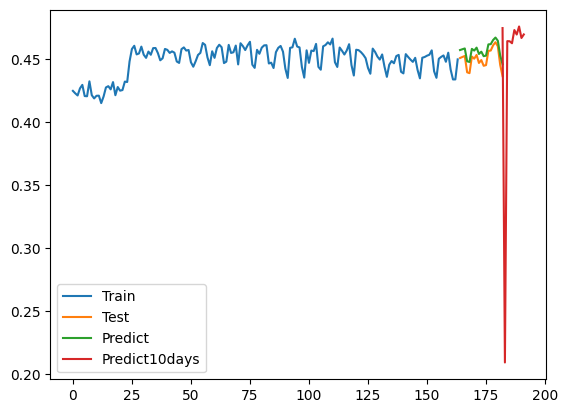

In [18]:
# 14.Vẽ hình

train_data_index = pd.RangeIndex(start=0, stop=train_size, step=1)
plt.plot(scaler.inverse_transform(train_data))

test_data_index = pd.RangeIndex(start=train_size, stop=train_size+test_size, step=1)
plt.plot(test_data_index,scaler.inverse_transform(test_data))
test_data_index = pd.RangeIndex(start=train_size, stop=train_size+test_size, step=1)
plt.plot(test_data_index,y_pred)

prediect_data_index = pd.RangeIndex(start=len(df1)-1, stop=len(df1)+9, step=1)
plt.plot(prediect_data_index,scaler.inverse_transform(lst_output))
plt.legend(['Train','Test','Predict','Predict10days'])
plt.show()

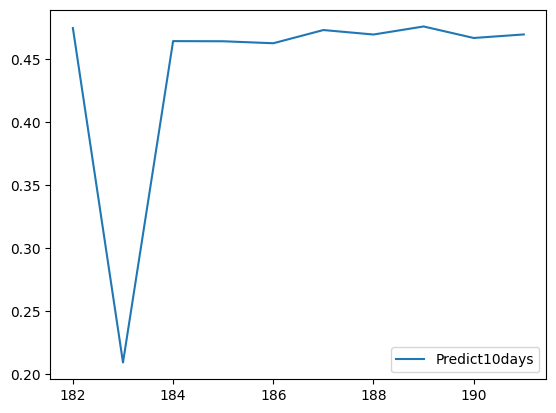

In [19]:
# 14.Vẽ hình
# Dự đoán 10 ngày tiếp theo
prediect_data_index = pd.RangeIndex(start=len(df1)-1, stop=len(df1)+9, step=1)
plt.plot(prediect_data_index,scaler.inverse_transform(lst_output))
plt.legend(['Predict10days'])
plt.show()

In [20]:
print(scaler.inverse_transform(lst_output))

[[0.47487725]
 [0.20951736]
 [0.46452879]
 [0.46441566]
 [0.46283363]
 [0.47331934]
 [0.46976384]
 [0.47614691]
 [0.4670174 ]
 [0.46982883]]
